 #  A Whale off the Port(folio)

In [129]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns



In [130]:
# Reading whale returns
whale_returns_path = Path("../Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [131]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [132]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [133]:
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## S&P 500 Returns

In [134]:
# Reading S&P 500 Closing Pricessp500_history_path = Path("../Resources/sp500_history.csv")
sp500_history_path = Path('../Resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [135]:
# Count nulls
sp500_history.isnull().sum()

Close    0
dtype: int64

In [136]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.isnull().sum()

Close    0
dtype: int64

In [137]:
# Checking Data Type
sp500_history.dtypes

Close    object
dtype: object

In [138]:
sp500_clean = sp500_history["Close"].str.replace("$", "").astype(float)
sp500_clean.head()

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: float64

In [139]:
# Use the `pct_change` function to calculate daily returns
sp500_dailyreturns = sp500_clean.pct_change()
sp500_dailyreturns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [140]:
# Rename Column
sp500_dailyreturns.rename(columns={"0":"SP500"})
sp500_dailyreturns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

## Algorithmic Daily Returns

In [141]:
# Reading algorithmic returns
algo_returns_path = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [142]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [143]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [144]:
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## Combine Whale, Algorithmic, and S&P 500 Returns

In [145]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns, algo_returns, sp500_dailyreturns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)


combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

## Performance

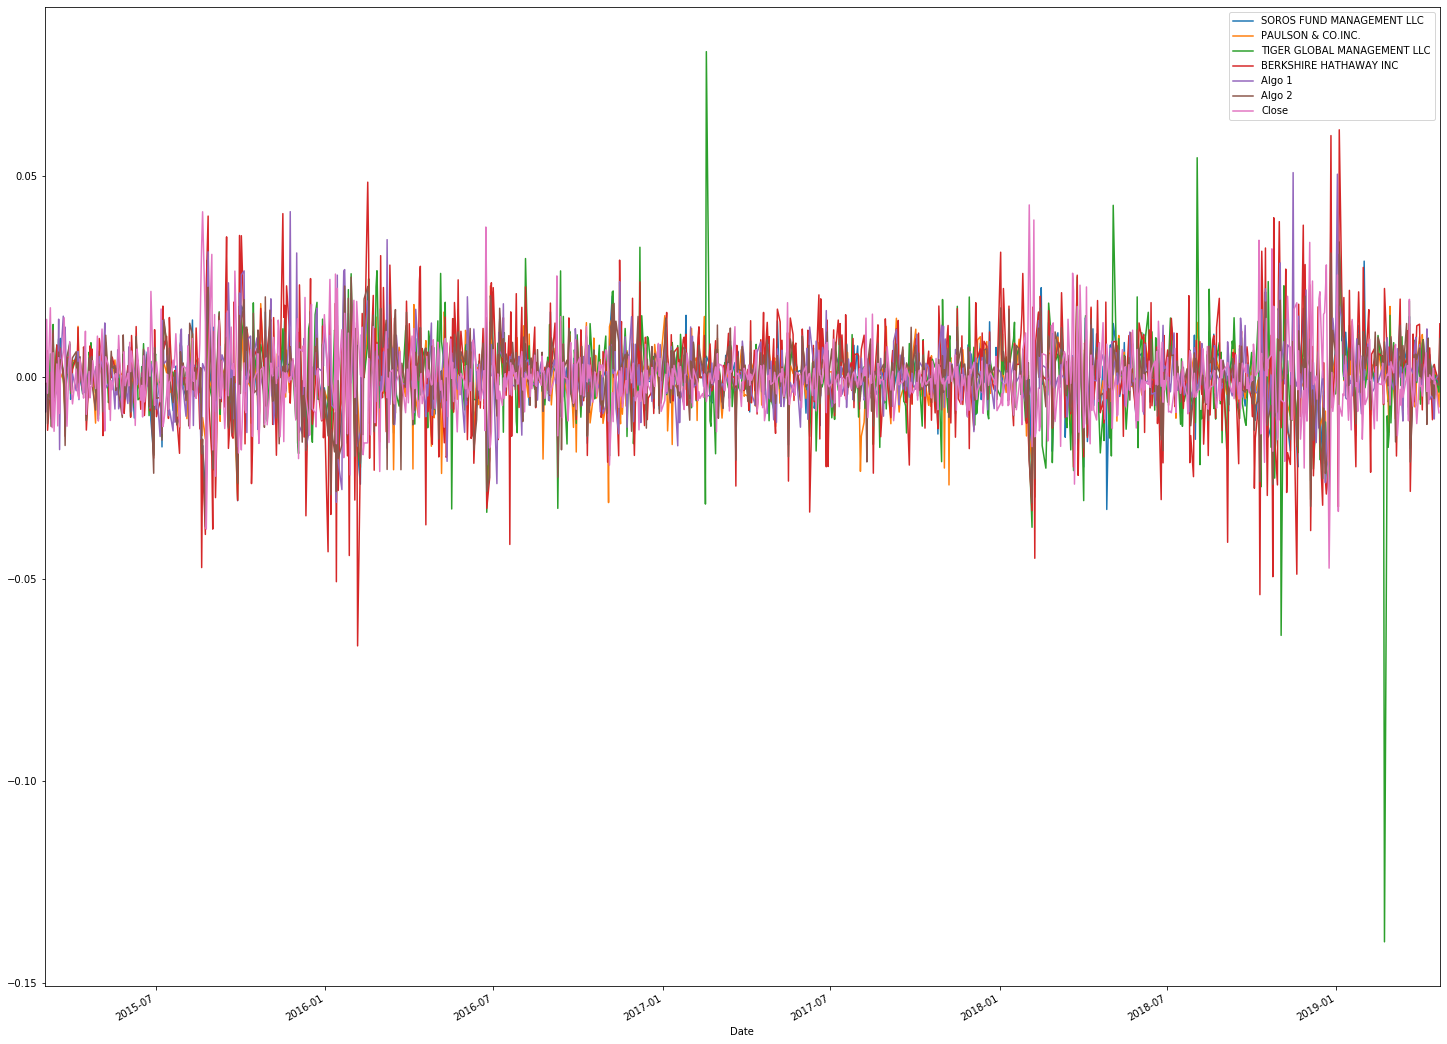

In [146]:
# Plot daily returns
combined_df.plot(figsize=(25, 20))

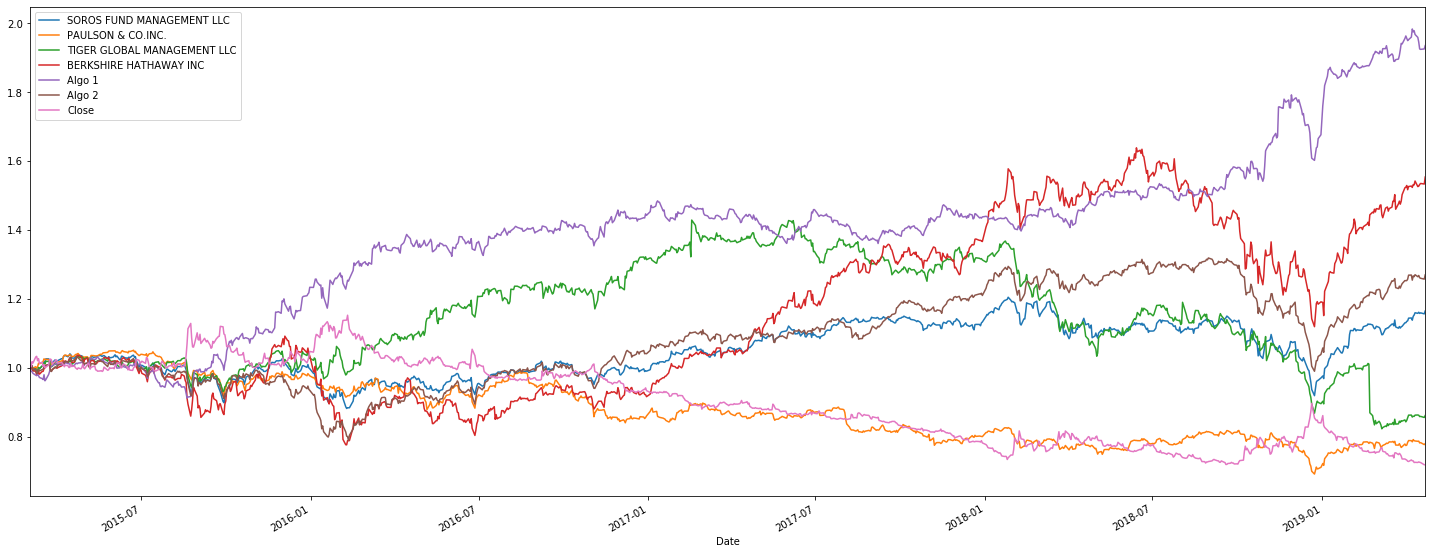

In [147]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(25, 10))

---

## Performance by Month and Year

In [148]:
# Returns by Month

# End of Month Returns
last_of_month_ret = cumulative_returns.groupby(
    [cumulative_returns.index.year, cumulative_returns.index.month]
).last()

# Calculate the monthly returns
monthly_returns = last_of_month_ret / last_of_month_ret.shift() - 1

monthly_returns.index.names = ["Year", "Month"]
monthly_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Year Month                                                  
2015 3                            NaN                 NaN   
     4                       0.003248            0.016876   
     5                       0.008094            0.019797   
     6                      -0.020352           -0.011427   
     7                      -0.014779           -0.018293   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Year Month                                                                  
2015 3                              NaN                     NaN       NaN   
     4                         0.010373                0.011927 -0.007167   
     5                        -0.001410                0.001002  0.009439   
     6                        -0.023138               -0.020195 -0.003230   
     7                         0.020172               -0.021668 -0.051560   

              Algo 2     Close  
Year Month                      
2015 3           NaN       NaN  
     4      0.009620 -0.023052  
     5      0.000920 -0.001629  
     6     -0.009999  0.016516  
     7     -0.016582 -0.009828

In [149]:
# Portfolio Returns for each year

In [150]:
# Returns by Year

# End of Year Returns
last_of_year_ret = cumulative_returns.groupby([cumulative_returns.index.year]).last()

# Calculate the yearly returns
yearly_returns = last_of_year_ret / last_of_year_ret.shift() - 1

yearly_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,-0.006991,-0.119136,0.278194,-0.114539,0.169350,0.113744,-0.108587
2017,0.144073,-0.069746,-0.000498,0.491562,-0.003228,0.162514,-0.162467
2018,-0.143357,-0.111315,-0.317783,-0.128091,0.165843,-0.141432,0.074015
2019,0.200247,0.096603,-0.038493,0.304057,0.154337,0.222163,-0.144409


## Risk

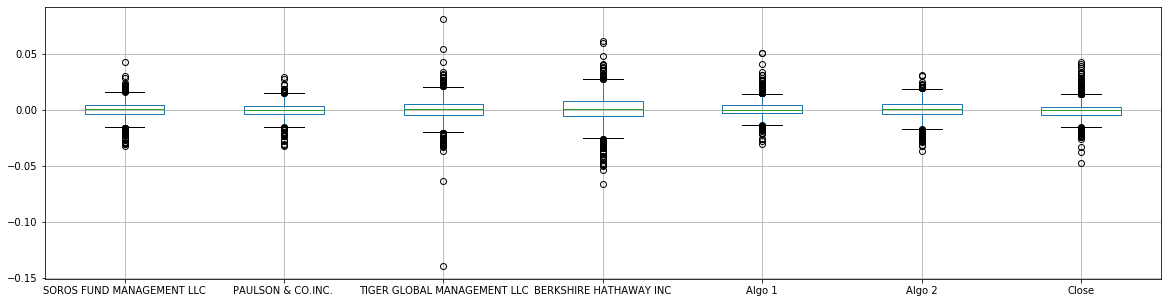

In [151]:
# Box plot
boxplot = combined_df.boxplot(figsize=(20,5))

In [152]:
# Daily Standard Deviations
dailystd = combined_df.std()
dailystd.sort_values(inplace=True)
dailystd

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
Close                          0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [153]:
# Determine which portfolios are riskier than the S&P 500
annualstd = combined_df.std()* np.sqrt(252)
annualstd.sort_values(inplace=True)
annualstd

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
Close                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

A. Only Tiger Global and Berkshire Hathaway Portfolios are riskier than S&P 500 since their standard deviation is higher than S&P500.

---

## Rolling Statistics
Risk changes over time. Analisys of the rolling statistics for Risk and Beta. 

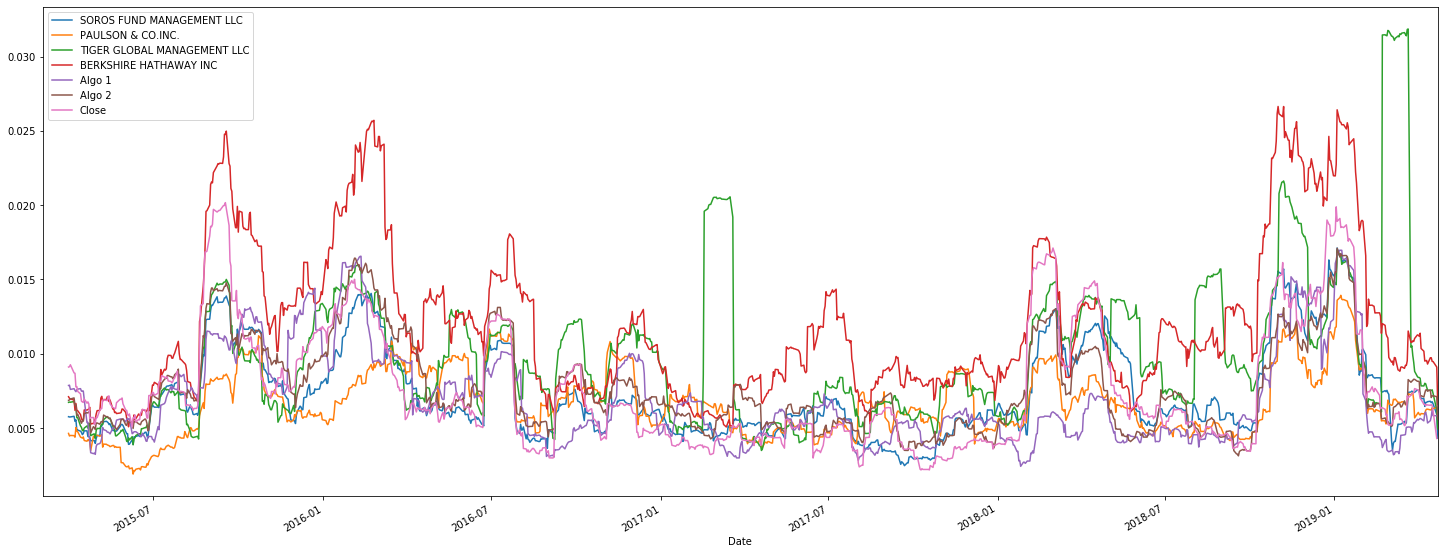

In [154]:
#Rolling Standard Deviation with 21 days window.
combined_df.rolling(window=21).std().plot(figsize=(25,10))

In [155]:
#Correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


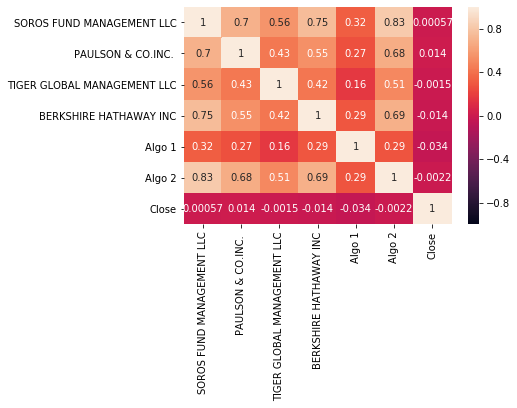

In [156]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [157]:
#Calculating Berkshire Hathaway covariance and S&P500 variance to get BH Beta.
bh_covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['Close'])
variance = combined_df['Close'].var()
bh_beta = bh_covariance / variance
print(f"Bershire Hathaway Inc Beta is: {bh_beta}")

Bershire Hathaway Inc Beta is: -0.020846489408902668


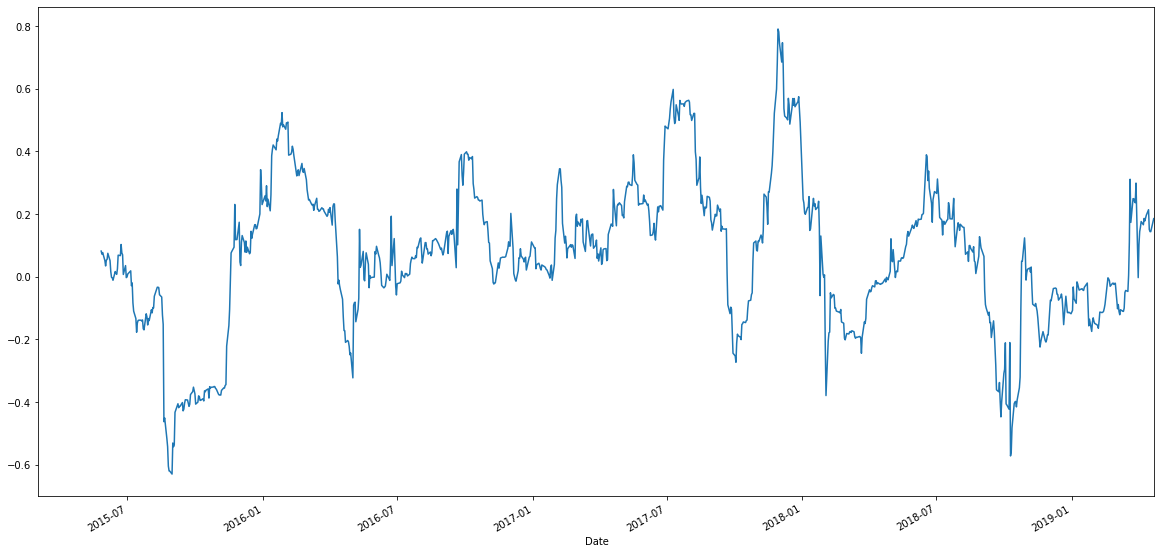

In [158]:
#Ploting  60 day Beta for Berkshire Hathaway Inc compared to the S&P 500
rolling_bh_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['Close'])
rolling_variance = combined_df['Close'].rolling(window=60).var()
rolling_bh_beta = rolling_bh_covariance / rolling_variance
rolling_bh_beta.plot(figsize=(20, 10))

##### A. None of the Portfolios seem to mimick the S&P500

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [159]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

Close                         -0.518582
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

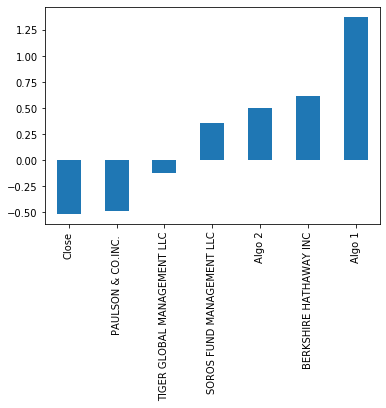

In [160]:
sharpe_ratios.plot.bar()

A. The algorithm 1 strategies outperform both 'the market' and the whales.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [161]:
# Read the first stock
goog_path = Path("GOOG.csv")
goog_df = pd.read_csv(goog_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,1228.000000,1233.469971,1210.209961,1220.010010,1220.010010,1567200
2018-08-02,1205.900024,1229.880005,1204.790039,1226.150024,1226.150024,1531300
2018-08-03,1229.619995,1230.000000,1215.060059,1223.709961,1223.709961,1089600
2018-08-06,1225.000000,1226.088013,1215.796997,1224.770020,1224.770020,1081700
2018-08-07,1237.000000,1251.170044,1236.170044,1242.219971,1242.219971,1494000


In [162]:
goog_price = goog_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
goog_price = goog_price.rename(columns={"Close":"GOOG"})
goog_price.head()

,GOOG
Date,
2018-08-01,1220.010010
2018-08-02,1226.150024
2018-08-03,1223.709961
2018-08-06,1224.770020
2018-08-07,1242.219971


In [163]:
# Read the second stock
cmg_path = Path("CMG.csv")
cmg_df = pd.read_csv(cmg_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
cmg_price = cmg_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
cmg_price = cmg_price.rename(columns={"Close":"CMG"})
cmg_price.head()

,CMG
Date,
2018-08-01,442.630005
2018-08-02,460.380005
2018-08-03,463.269989
2018-08-06,475.250000
2018-08-07,478.019989


In [164]:
# Read the third stock
amd_path = Path("AMD.csv")
amd_df = pd.read_csv(amd_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
amd_price = amd_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
amd_price = amd_price.rename(columns={"Close":"AMD"})
amd_price.head()

,AMD
Date,
2018-08-01,18.480000
2018-08-02,18.790001
2018-08-03,18.490000
2018-08-06,19.430000
2018-08-07,19.559999


In [171]:
# Concatenate all stocks into a single DataFrame
myportfolio_df = pd.concat([goog_price, amd_price, cmg_price],axis='columns', join='inner')
myportfolio_df.sort_index(inplace=True)
myportfolio_df.head()

,GOOG,AMD,CMG
Date,,,
2018-08-01,1220.010010,18.480000,442.630005
2018-08-02,1226.150024,18.790001,460.380005
2018-08-03,1223.709961,18.490000,463.269989
2018-08-06,1224.770020,19.430000,475.250000
2018-08-07,1242.219971,19.559999,478.019989


In [172]:
# Drop Nulls
myportfolio_df.isnull().sum()

GOOG    0
AMD     0
CMG     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

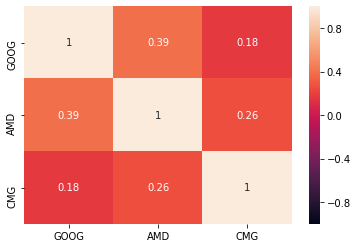

In [173]:
# Calculate daily returns
daily_returns = myportfolio_df.pct_change()
correlation = daily_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [174]:
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

GOOG    0.110405
AMD     1.045857
CMG     2.067660
dtype: float64

In [175]:
#Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portf_returns = daily_returns.dot(weights)

In [178]:
compare_df = pd.concat([combined_df,portf_returns], axis='columns', join='inner')
compare_df.rename(columns={0:"Custom"}, inplace=True)
compare_df.sort_index(inplace=True)
compare_df.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.006254
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.011370
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.008022
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.010178
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,NaN,0.002085


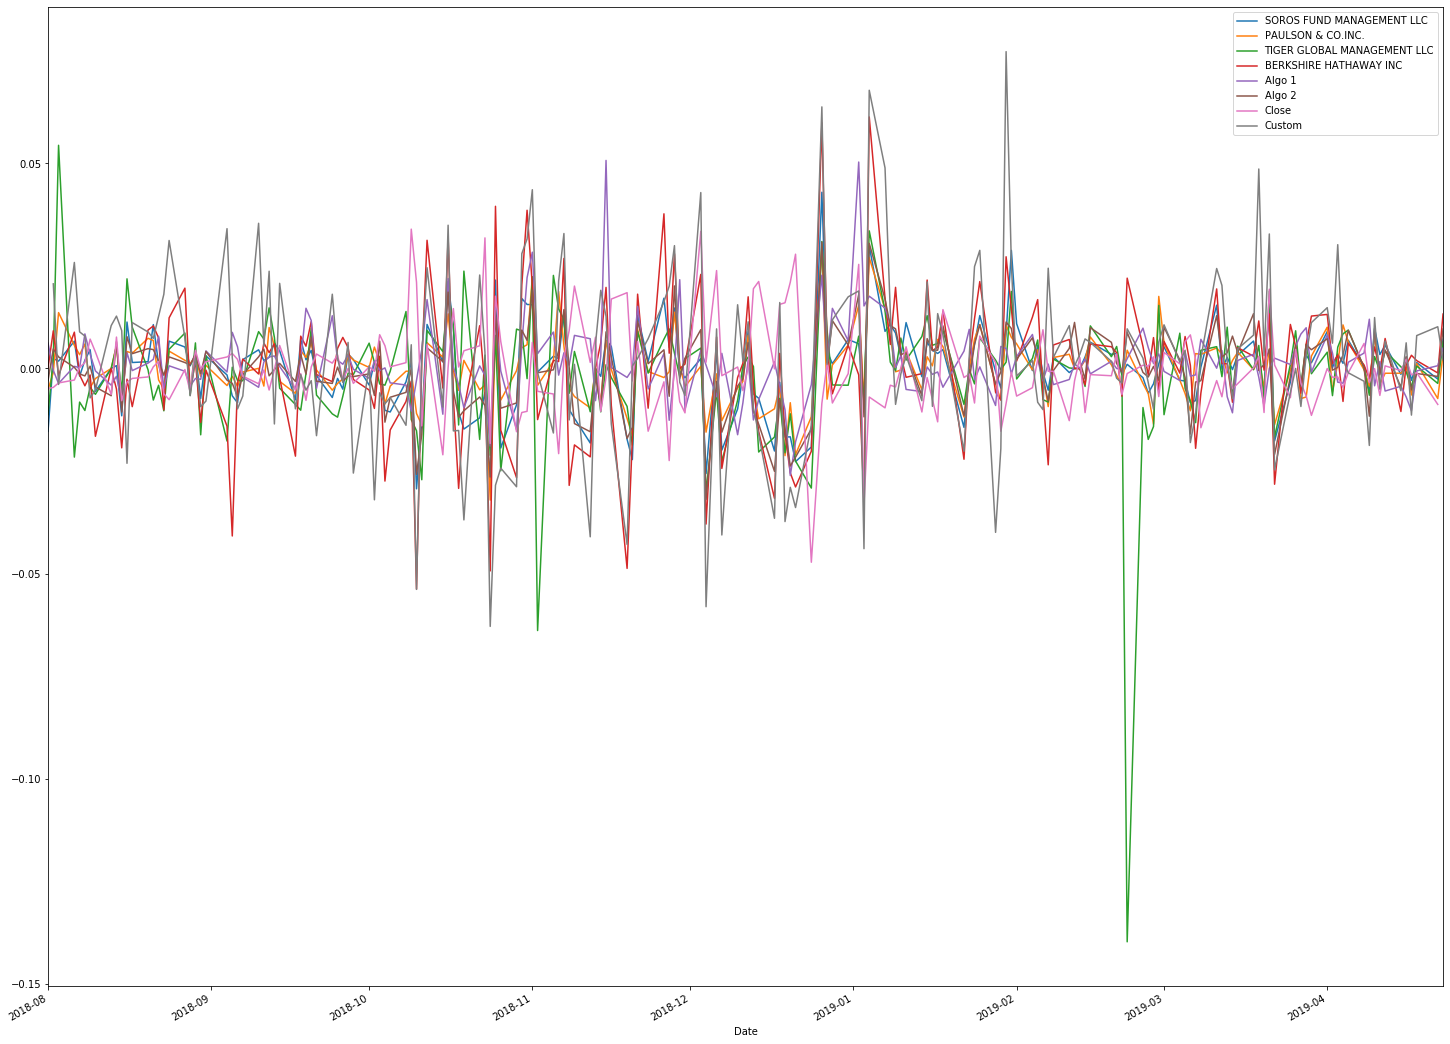

In [179]:
compare_df.plot(figsize=(25, 20))

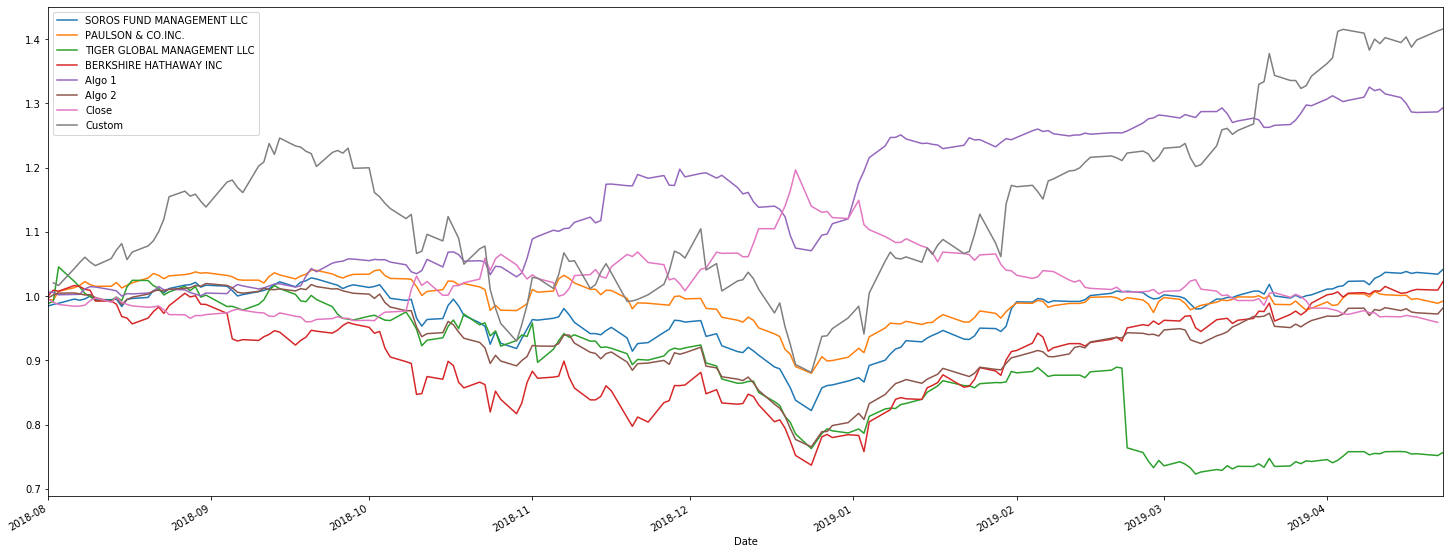

In [180]:
# Plot cumulative returns
cumulative_returns_2 = (1 + compare_df).cumprod()
cumulative_returns_2.plot(figsize=(25, 10))

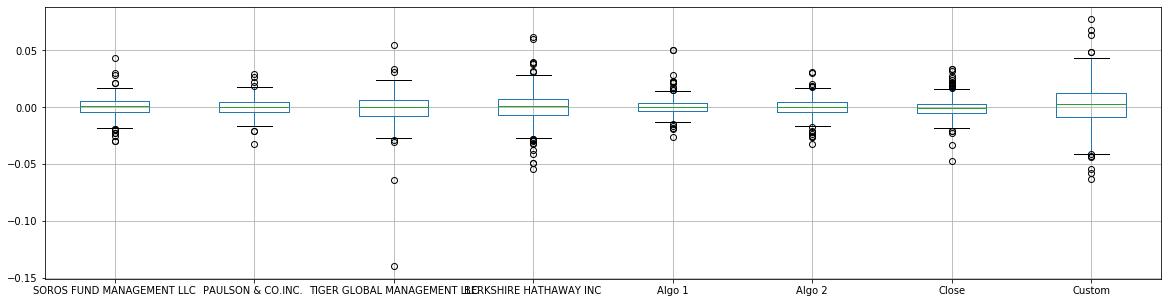

In [181]:
# Box plot
boxplot_2 = compare_df.boxplot(figsize=(20,5))

In [182]:
# Determine which portfolios are riskier than the S&P 500
annualstd_2 = compare_df.std()* np.sqrt(252)
annualstd_2.sort_values(inplace=True)
annualstd_2

PAULSON & CO.INC.              0.127250
Algo 1                         0.146976
Algo 2                         0.151004
SOROS FUND MANAGEMENT LLC      0.160334
Close                          0.166977
TIGER GLOBAL MANAGEMENT LLC    0.256464
BERKSHIRE HATHAWAY INC         0.266698
Custom                         0.340114
dtype: float64

In [183]:
# Annualzied Sharpe Ratios
sharpe_ratios_2 = (compare_df.mean() * 252) / (compare_df.std() * np.sqrt(252))
sharpe_ratios_2.sort_values(inplace=True)
sharpe_ratios_2

TIGER GLOBAL MANAGEMENT LLC   -1.371106
Close                         -0.266153
Algo 2                        -0.095813
PAULSON & CO.INC.             -0.021309
BERKSHIRE HATHAWAY INC         0.249280
SOROS FUND MANAGEMENT LLC      0.431602
Custom                         1.593738
Algo 1                         2.496000
dtype: float64

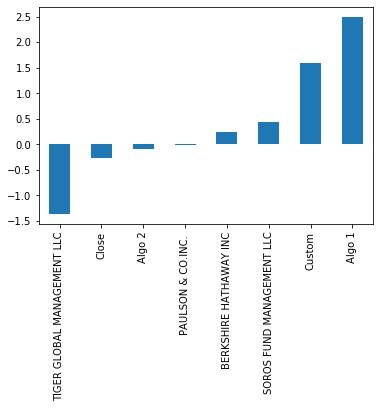

In [184]:
sharpe_ratios_2.plot.bar()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
Custom                         0.211627
dtype: float64

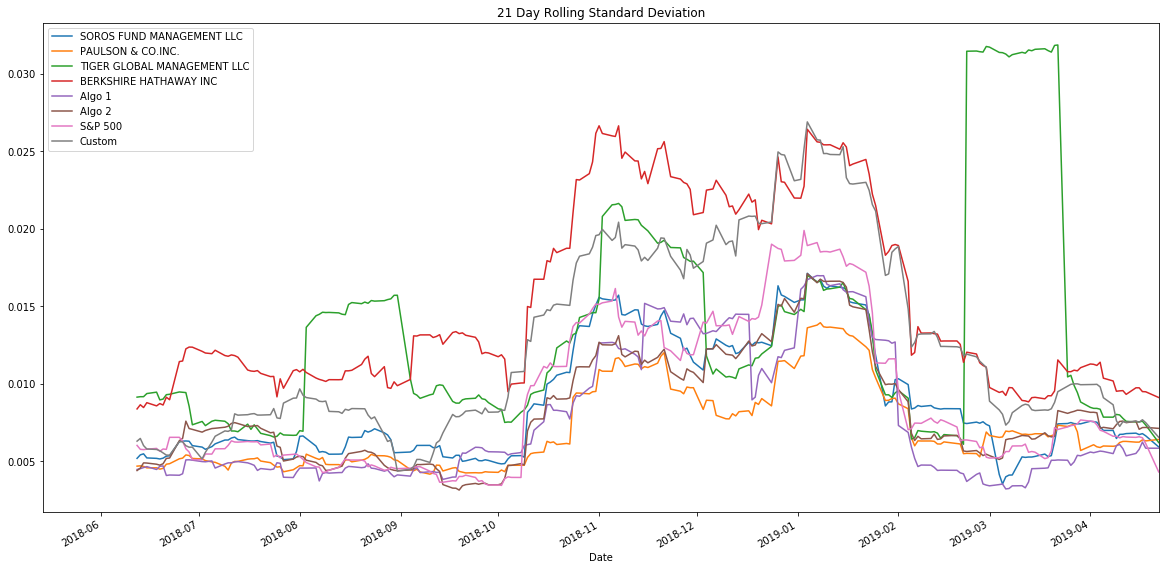

In [42]:
# Rolling
# YOUR CODE HERE

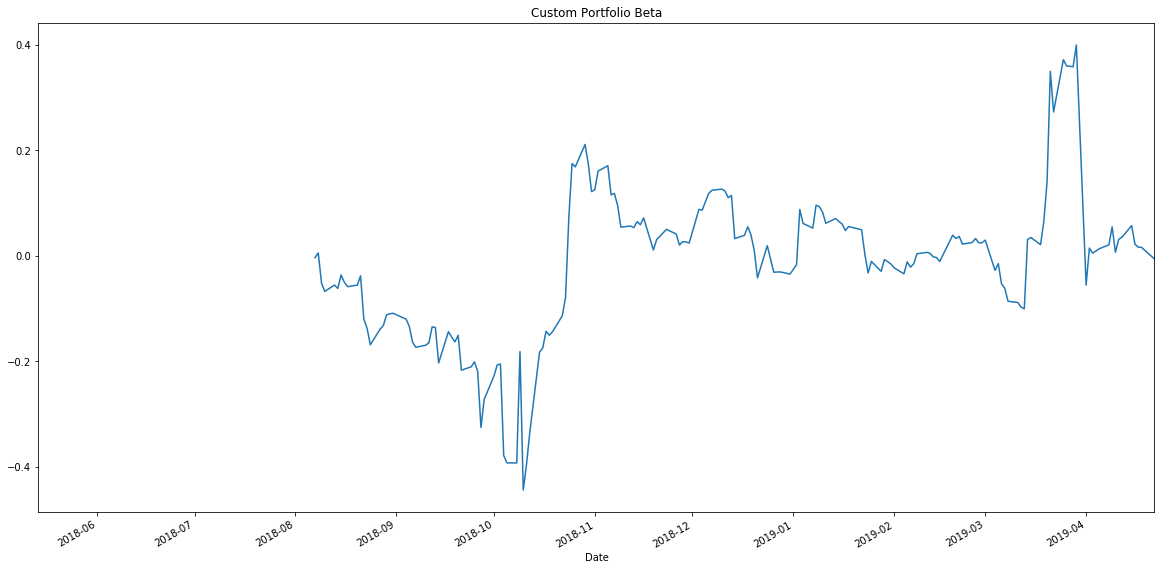

In [43]:
# Beta
# YOUR CODE HERE

In [44]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

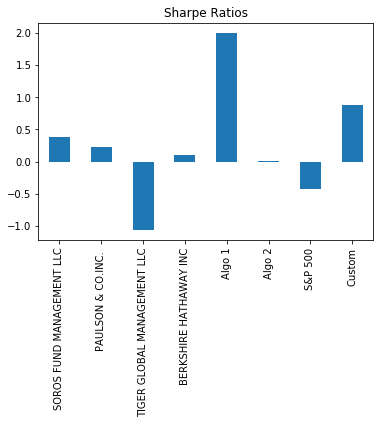

In [45]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [46]:
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791802,0.477844,0.816197,0.336909,0.862583,-0.0282556,0.732548
PAULSON & CO.INC.,0.791802,1,0.484869,0.65039,0.360727,0.783865,-0.0598624,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1,0.324306,0.113671,0.408402,0.00588055,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.65039,0.324306,1,0.325985,0.782054,-0.0388319,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1,-0.0425404,0.73902
S&P 500,-0.0282556,-0.0598624,0.00588055,-0.0388319,-0.054478,-0.0425404,1,0.00560346
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.73902,0.00560346,1
